In [ ]:
# !pip install gensim
# !pip install pyspellchecker

## Importing Required Libraries

In [2]:
import pandas as pd
import gensim.downloader as api
import re
from spellchecker import SpellChecker
import matplotlib.pyplot as plt


## Loading Dataset

In [3]:
# Reading data from CSV file
data = pd.read_csv('../train_data.csv')

C:\Users\DATIS STAR\AppData\Local\Temp\ipykernel_14132\692743926.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../train_data.csv')


## Exploring the Dataset

In [4]:
# Displaying the first few rows of the dataset
data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [5]:
# Getting statistical summary of the dataset
data.describe(include='all')

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
count,838944.000000,191468.0,838944,838944,838944,838944,490613,838717,838944,838868,8.389440e+05
unique,NaN,861.0,2,1007,321135,90715,40887,234102,807611,696896,NaN
top,NaN,2.0,True,2016-01-04,A680RUE1FDO8B,B010OYASRG,{'Color:': ' Black'},Amazon Customer,Love these!!!. Got one for front & back of ho...,Five Stars,NaN
freq,NaN,37154.0,720389,1976,158,1853,43589,24896,43,957,NaN
mean,4.021317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.483167e+09
std,1.344223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.229270e+07
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451606e+09
25%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.464653e+09
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.479254e+09
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.499472e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [7]:
# pd.set_option('display.max_colwidth', None)
# data[['reviewText', 'summary']]

In [8]:
data = data.dropna(subset=['reviewText','summary'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838868 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838868 non-null  int64 
 1   vote            191449 non-null  object
 2   verified        838868 non-null  bool  
 3   reviewTime      838868 non-null  object
 4   reviewerID      838868 non-null  object
 5   asin            838868 non-null  object
 6   style           490574 non-null  object
 7   reviewerName    838641 non-null  object
 8   reviewText      838868 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838868 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 71.2+ MB


## Model Training and Processing

In [10]:
model = api.load("word2vec-google-news-300")

print(model.most_similar('guarantee', topn=10))


[('guarantees', 0.822723925113678), ('guaranteed', 0.7438113689422607), ('guaranteeing', 0.7005587816238403), ('assure', 0.5853263735771179), ('assurances', 0.5550788044929504), ('ensure', 0.5258521437644958), ('Guarantee', 0.5235120058059692), ('assurance', 0.5162608027458191), ('insure', 0.5105894804000854), ('Disclaimer_Past_performance', 0.5068185329437256)]


In [11]:
guarantee_similar_words = model.most_similar("guarantee", topn=10)
warranty_similar_words = model.most_similar("warranty", topn=10)

print("like 'guarantee':", guarantee_similar_words)
print("like 'warranty':", warranty_similar_words)


like 'guarantee': [('guarantees', 0.822723925113678), ('guaranteed', 0.7438113689422607), ('guaranteeing', 0.7005587816238403), ('assure', 0.5853263735771179), ('assurances', 0.5550788044929504), ('ensure', 0.5258521437644958), ('Guarantee', 0.5235120058059692), ('assurance', 0.5162608027458191), ('insure', 0.5105894804000854), ('Disclaimer_Past_performance', 0.5068185329437256)]
like 'warranty': [('warranties', 0.8235853910446167), ('warrantee', 0.781966507434845), ('Warranty', 0.7335840463638306), ('lifetime_warranty', 0.697948157787323), ('Limited_Warranty', 0.6898940205574036), ('extended_warranties', 0.6476331353187561), ('warrantees', 0.6356005072593689), ('warrenty', 0.6332387924194336), ('five-year/###_,###_mile', 0.6254701018333435), ('Lifetime_Warranty', 0.6205177903175354)]


In [12]:
# guarantee and warranty similar words
keywords = ["guarantee", "warranty"]
keywords += [word for word, _ in guarantee_similar_words]
keywords += [word for word, _ in warranty_similar_words]
keywords

['guarantee',
 'warranty',
 'guarantees',
 'guaranteed',
 'guaranteeing',
 'assure',
 'assurances',
 'ensure',
 'Guarantee',
 'assurance',
 'insure',
 'Disclaimer_Past_performance',
 'warranties',
 'warrantee',
 'Warranty',
 'lifetime_warranty',
 'Limited_Warranty',
 'extended_warranties',
 'warrantees',
 'warrenty',
 'five-year/###_,###_mile',
 'Lifetime_Warranty']

In [13]:
# delete extra symbols and spaces and enters(\n)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [14]:
data['cleaned_review'] = data['reviewText'].apply(clean_text)

In [15]:
data['cleaned_summary'] = data['summary'].apply(clean_text)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838868 entries, 0 to 838943
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   overall          838868 non-null  int64 
 1   vote             191449 non-null  object
 2   verified         838868 non-null  bool  
 3   reviewTime       838868 non-null  object
 4   reviewerID       838868 non-null  object
 5   asin             838868 non-null  object
 6   style            490574 non-null  object
 7   reviewerName     838641 non-null  object
 8   reviewText       838868 non-null  object
 9   summary          838868 non-null  object
 10  unixReviewTime   838868 non-null  int64 
 11  cleaned_review   838868 non-null  object
 12  cleaned_summary  838868 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 84.0+ MB


In [17]:
# find keywords in reviews
filtered_reviews = data[data['cleaned_review'].str.contains('|'.join(keywords), case=False, na=False)]

In [18]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 155 to 838901
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          23962 non-null  int64 
 1   vote             8290 non-null   object
 2   verified         23962 non-null  bool  
 3   reviewTime       23962 non-null  object
 4   reviewerID       23962 non-null  object
 5   asin             23962 non-null  object
 6   style            13978 non-null  object
 7   reviewerName     23956 non-null  object
 8   reviewText       23962 non-null  object
 9   summary          23962 non-null  object
 10  unixReviewTime   23962 non-null  int64 
 11  cleaned_review   23962 non-null  object
 12  cleaned_summary  23962 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 2.4+ MB


In [19]:
# find keywords in summaries
filtered_summaries = data[data['summary'].str.contains('|'.join(keywords), case=False, na=False)]

In [20]:
filtered_summaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2145 entries, 253 to 837637
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          2145 non-null   int64 
 1   vote             716 non-null    object
 2   verified         2145 non-null   bool  
 3   reviewTime       2145 non-null   object
 4   reviewerID       2145 non-null   object
 5   asin             2145 non-null   object
 6   style            1289 non-null   object
 7   reviewerName     2144 non-null   object
 8   reviewText       2145 non-null   object
 9   summary          2145 non-null   object
 10  unixReviewTime   2145 non-null   int64 
 11  cleaned_review   2145 non-null   object
 12  cleaned_summary  2145 non-null   object
dtypes: bool(1), int64(2), object(10)
memory usage: 219.9+ KB


In [21]:
# concat and delete duplicates
filtered = pd.concat([filtered_reviews, filtered_summaries], ignore_index=True)
filtered = filtered.drop_duplicates()

In [22]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24146 entries, 0 to 26100
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          24146 non-null  int64 
 1   vote             8357 non-null   object
 2   verified         24146 non-null  bool  
 3   reviewTime       24146 non-null  object
 4   reviewerID       24146 non-null  object
 5   asin             24146 non-null  object
 6   style            14073 non-null  object
 7   reviewerName     24140 non-null  object
 8   reviewText       24146 non-null  object
 9   summary          24146 non-null  object
 10  unixReviewTime   24146 non-null  int64 
 11  cleaned_review   24146 non-null  object
 12  cleaned_summary  24146 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 2.4+ MB


In [23]:
# average of  overal scores
average = filtered['overall'].mean()
average

3.425122173444877

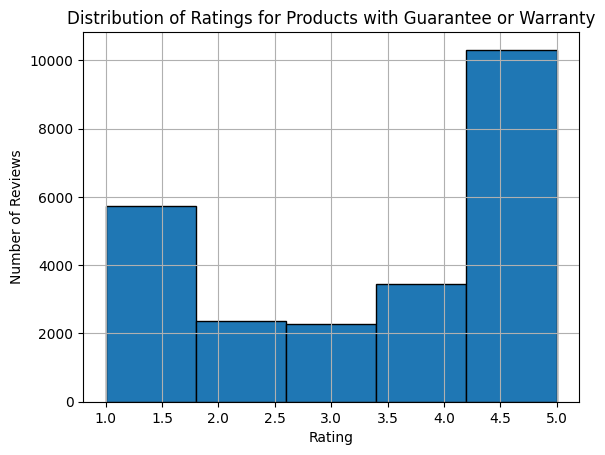

In [24]:
# plot overal range
plt.hist(filtered['overall'], bins=5, edgecolor='black')
plt.title("Distribution of Ratings for Products with Guarantee or Warranty")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

### make two dataframe from main data

In [25]:
# dataframe without guarantee and warranty keywords
df_result = pd.concat([filtered, data]).drop_duplicates(keep=False)

In [26]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798346 entries, 0 to 838943
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   overall          798346 non-null  int64 
 1   vote             180414 non-null  object
 2   verified         798346 non-null  bool  
 3   reviewTime       798346 non-null  object
 4   reviewerID       798346 non-null  object
 5   asin             798346 non-null  object
 6   style            465912 non-null  object
 7   reviewerName     798131 non-null  object
 8   reviewText       798346 non-null  object
 9   summary          798346 non-null  object
 10  unixReviewTime   798346 non-null  int64 
 11  cleaned_review   798346 non-null  object
 12  cleaned_summary  798346 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 79.9+ MB


In [27]:
df_result = df_result[['overall', 'cleaned_review', 'cleaned_summary']]

In [28]:
df_result.to_csv('../no_keywords_filtered.csv',index=False)

In [29]:
# dataframe with guarantee and warranty keywords
df_filtered = filtered[['overall', 'cleaned_review', 'cleaned_summary']]

In [30]:
df_filtered.to_csv('../with_keywords.csv',index=False)